In [8]:
!git clone https://github.com/anilsinghchawda/data

Cloning into 'data'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [17]:
cd data

/content/data


In [18]:
cd kn

/content/data/kn


In [0]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [3]:
import keras
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Embedding, GlobalAveragePooling1D, Activation, Flatten, Dropout, MaxPooling1D, Embedding, GlobalMaxPooling1D

from keras.layers.core import Dense, Dropout


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
train = pd.read_csv('train.csv')
print(len(train))
test = pd.read_csv('test.csv')
print(len(test))
df_full = pd.concat([train,test])
print(len(df_full))

82657
20665
103322


In [21]:
df_full.head(10)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9,@kerinokeefe,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,Ceppeto Riserva,86,31.0,Tuscany,Chianti Classico,NaN,Mannucci Droandi,Red Blend


In [24]:
variety_counts = pd.DataFrame(train['variety'].value_counts())
varieties = list(variety_counts.index[variety_counts['variety'] > 500])
# total number of distinct varieties
len(varieties)

28

In [0]:
df = train[train['variety'].isin(varieties)]

In [26]:
df.variety.value_counts()

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [0]:
df['variety_code'] = pd.Categorical(df.variety).codes

In [28]:
df[['variety','variety_code']]

,variety,variety_code
0,Chardonnay,5
1,Red Blend,17
2,Nebbiolo,11
3,Bordeaux-style White Blend,1
4,Malbec,9
...,...,...
82652,Tempranillo,25
82653,Cabernet Sauvignon,3
82654,Gamay,6
82655,Bordeaux-style Red Blend,0


In [0]:
x = df.review_description.values
y = df.variety_code.values

In [30]:
maxwords = 25000
tokenizer = Tokenizer(num_words = maxwords)

tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)
maxlen = max(len(x) for x in x_sequences)
print(maxlen)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

136


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, test_size=0.20, random_state=22)

In [0]:
model = Sequential()
model.add(Embedding(input_dim=maxwords,
                    output_dim=136))


model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))

model.add(Dense(100, activation="softmax"))

In [0]:
opt = keras.optimizers.Adam(lr=0.01) # speed up optimization
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["acc"])

In [34]:
fit = model.fit(x_train, y_train,
            batch_size=512,
            epochs=10,
            validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 66125 samples, validate on 16532 samples
Epoch 1/10
66125/66125 [==============================] - 10s 146us/step - loss: 2.8532 - acc: 0.2281 - val_loss: 2.1416 - val_acc: 0.3905
Epoch 2/10
66125/66125 [==============================] - 9s 141us/step - loss: 1.8105 - acc: 0.4605 - val_loss: 1.4902 - val_acc: 0.5485
Epoch 3/10
66125/66125 [==============================] - 9s 142us/step - loss: 1.3657 - acc: 0.5893 - val_loss: 1.2102 - val_acc: 0.6320
Epoch 4/10
66125/66125 [==============================] - 9s 141us/step - loss: 1.1336 - acc: 0.6564 - val_loss: 1.0762 - val_acc: 0.6715
Epoch 5/10
66125/66125 [==============================] - 9s 140us/step - loss: 0.9958 - acc: 0.6997 - val_loss: 1.0004 - val_acc: 0.6939
Epoch 6/10
66125/66125 [==============================] - 9s 141us/step - loss: 0.8949 - acc: 0.7319 - val_loss: 0.9600 - val_acc: 0.7045
Epoch 7/10
66125/66125 [==============================] - 9s 143us/step - loss: 0.8224 - acc: 0.7535 - val_loss: 0.9375 -

In [35]:
print('accuracy', model.evaluate(x_test, y_test)[1])

16532/16532 [==============================] - 1s 39us/step
accuracy 0.7153399586677551


In [36]:
print('train accuracy', model.evaluate(x_train, y_train)[1])

66125/66125 [==============================] - 3s 40us/step
train accuracy 0.8366881012916565


In [0]:
y_pred1 = model.predict_classes(x_test)
# print(classification_report(y_test, y_pred4))

cm = confusion_matrix(y_test, y_pred1) # only works with sparse
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracies = cm.diagonal()

In [0]:
labels = sorted(lookup.items(), key=lambda x: x[0])
labels = [vv[1] for vv in labels]

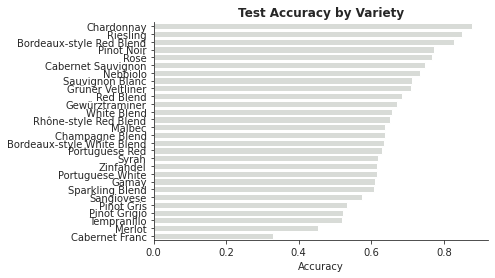

In [41]:
acc_order = np.argsort(-accuracies) # get index to sort by

sns.barplot(y=np.array(labels)[acc_order], x=accuracies[acc_order], color='#d8dcd6')
plt.title('Test Accuracy by Variety', fontweight="bold")
plt.xlabel('Accuracy')
sns.despine()
plt.show()

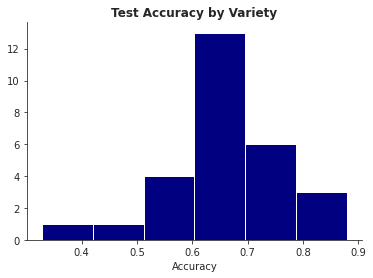

In [42]:
plt.hist(accuracies, bins=6, color='navy')
plt.title('Test Accuracy by Variety', fontweight="bold")
plt.xlabel('Accuracy')
sns.despine()
plt.show()

In [0]:
model.save('wine variety.h5')